In [1]:
using JuMP, Cbc

plant = 1:3
bakery = 1:3

m = Model()

@variable(m, x[plant, bakery] >= 0)
@variable(m, y[plant], Bin)

@objective(m, Min, sum(15x[1,1] + 10x[1,2] + 12x[1,3] + 20x[2,1] + 18x[2,2] + 21x[2,3] + 17x[3,1] + 15x[3,2] + 11x[3,3] +
        10000y[1] + 11000y[2] + 9000y[3]))

@constraint(m, binary_1, x[1,1] + x[1,2] + x[1,3] <= 1600 * y[1])
@constraint(m, binary_2, x[2,1] + x[2,2] + x[2,3] <= 1500 * y[2])
@constraint(m, binary_3, x[3,1] + x[3,2] + x[3,3] <= 1200 * y[3])
@constraint(m, demand_1, x[1,1] + x[2,1] + x[3,1] >= 1600)
@constraint(m, demand_2, x[1,2] + x[2,2] + x[3,2] >= 900)
@constraint(m, demand_3, x[1,3] + x[2,3] + x[3,3] >= 1000)

set_optimizer(m, Cbc.Optimizer)

optimize!(m)

solution_summary(m, verbose = true)

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 72033.3 - 0.00 seconds
Cgl0004I processed model has 6 rows, 12 columns (3 integer (3 of which binary)) and 21 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.466667
Cbc0038I Pass   1: suminf.    0.46667 (1) obj. 72033.3 iterations 0
Cbc0038I Solution found of 77900
Cbc0038I Relaxing continuous gives 77900
Cbc0038I Before mini branch and bound, 2 integers at bound fixed and 4 continuous
Cbc0038I Full problem 6 rows 12 columns, reduced to 1 rows 3 columns
Cbc0038I Mini branch and bound did not improve solution (0.02 seconds)
Cbc0038I Round again with cutoff of 77313.3
Cbc0038I Reduced cost fixing fixed 1 variables on major pass 2
Cbc0038I Pass   2: suminf.    0.46667 (1) obj. 72033.3 iterations 0
Cbc0038I Pass   3: suminf.    0.05333 (1) obj. 77313.3 iterations 1
Cbc0038I Pass   4: suminf.    0.05333 (1)

* Solver : COIN Branch-and-Cut (Cbc)

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Result count       : 1
  Has duals          : false
  Message from the solver:
  "Cbc_status          = finished - check isProvenOptimal or isProvenInfeasible to see if solution found (or check value of best solution)
Cbc_secondaryStatus = search completed with solution
"

* Candidate solution
  Objective value      : 77900.0
  Objective bound      : 77900.0
  Primal solution :
    x[1,1] : 699.9999999999998
    x[1,2] : 900.0
    x[1,3] : 0.0
    x[2,1] : 699.9999999999998
    x[2,2] : 0.0
    x[2,3] : 0.0
    x[3,1] : 200.00000000000014
    x[3,2] : 0.0
    x[3,3] : 1000.0
    y[1] : 0.9999999999999999
    y[2] : 0.9999999999999999
    y[3] : 1.0

* Work counters
  Solve time (sec)   : 0.03800


In [2]:
m = Model()

@variable(m, x[plant, bakery] >= 0)
@variable(m, y[plant], Bin)

@objective(m, Max, sum(x[1,1] + x[1,2] + x[1,3] + x[2,1] + x[2,2] + x[2,3] + x[3,1] + x[3,2] + x[3,3]))

@constraint(m, budgetcon, sum(15x[1,1] + 10x[1,2] + 12x[1,3] + 20x[2,1] + 18x[2,2] + 21x[2,3] + 17x[3,1] + 15x[3,2] + 11x[3,3] +
        10000y[1] + 11000y[2] + 9000y[3]) <= 25000)
@constraint(m, demand_1, x[1,1] + x[2,1] + x[3,1] <= 1600)
@constraint(m, demand_2, x[1,2] + x[2,2] + x[3,2] <= 900)
@constraint(m, demand_3, x[1,3] + x[2,3] + x[3,3] <= 1000)
@constraint(m, binary_1, x[1,1] + x[1,2] + x[1,3] <= 1600 * y[1])
@constraint(m, binary_2, x[2,1] + x[2,2] + x[2,3] <= 1500 * y[2])
@constraint(m, binary_3, x[3,1] + x[3,2] + x[3,3] <= 1200 * y[3])


set_optimizer(m, Cbc.Optimizer)

optimize!(m)

solution_summary(m, verbose = true)

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Jan  1 1970 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Continuous objective value is 1468.49 - 0.00 seconds
Cgl0004I processed model has 7 rows, 12 columns (3 integer (3 of which binary)) and 33 elements
Cbc0038I Initial state - 1 integers unsatisfied sum - 0.0821918
Cbc0038I Pass   1: suminf.    0.00000 (0) obj. -1400 iterations 1
Cbc0038I Solution found of -1400
Cbc0038I Relaxing continuous gives -1400
Cbc0038I Before mini branch and bound, 2 integers at bound fixed and 8 continuous
Cbc0038I Full problem 7 rows 12 columns, reduced to 0 rows 0 columns
Cbc0038I Mini branch and bound did not improve solution (0.00 seconds)
Cbc0038I Round again with cutoff of -1406.85
Cbc0038I Reduced cost fixing fixed 1 variables on major pass 2
Cbc0038I Pass   2: suminf.    0.00822 (1) obj. -1406.85 iterations 1
Cbc0038I Pass   3: suminf.    0.12072 (1) obj. -1406.85 iterations 2
Cbc0038I Pass   4: suminf.    0.12072 (

* Solver : COIN Branch-and-Cut (Cbc)

* Status
  Termination status : OPTIMAL
  Primal status      : FEASIBLE_POINT
  Dual status        : NO_SOLUTION
  Result count       : 1
  Has duals          : false
  Message from the solver:
  "Cbc_status          = finished - check isProvenOptimal or isProvenInfeasible to see if solution found (or check value of best solution)
Cbc_secondaryStatus = search completed with solution
"

* Candidate solution
  Objective value      : 1400.0
  Objective bound      : 1400.0
  Primal solution :
    x[1,1] : 0.0
    x[1,2] : 900.0
    x[1,3] : 500.0000000000002
    x[2,1] : 0.0
    x[2,2] : 0.0
    x[2,3] : 0.0
    x[3,1] : 0.0
    x[3,2] : 0.0
    x[3,3] : 0.0
    y[1] : 1.0
    y[2] : 0.0
    y[3] : 0.0

* Work counters
  Solve time (sec)   : 0.00700


[50000.0, 45000.0, 40000.0, 27400.0, 27400.0, 25000.0, 20000.0, 14999.999999999998, 10000.0]
[2629.4117647058824, 2300.0000000000005, 1966.6666666666665, 1599.9999999999998, 1599.9999999999998, 1400.0, 1000.0, 545.4545454545455, 90.90909090909092]

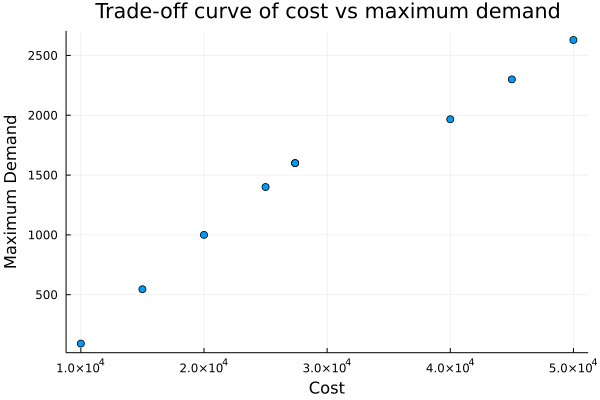

In [13]:
using JuMP, Cbc, Plots

m = Model()

@variable(m, x[plant, bakery] >= 0)
@variable(m, y[plant], Bin)
@variable(m, totalcost)
@variable(m, maxdemand >= 0)

@objective(m, Max, maxdemand)

@constraint(m, demand_equlizer, maxdemand == sum(x[1,1] + x[1,2] + x[1,3] + x[2,1] + x[2,2] + x[2,3] + x[3,1] + x[3,2] + x[3,3]))
@constraint(m, demand_1, x[1,1] + x[2,1] + x[3,1] <= 1600)
@constraint(m, demand_2, x[1,2] + x[2,2] + x[3,2] <= 900)
@constraint(m, demand_3, x[1,3] + x[2,3] + x[3,3] <= 1000)
@constraint(m, binary_1, x[1,1] + x[1,2] + x[1,3] <= 1600 * y[1])
@constraint(m, binary_2, x[2,1] + x[2,2] + x[2,3] <= 1500 * y[2])
@constraint(m, binary_3, x[3,1] + x[3,2] + x[3,3] <= 1200 * y[3])

## define totalcost variable, 
## but for now there is no constraint on it
@constraint(m, totalcostdef,
    totalcost == 
    sum(15x[1,1] + 10x[1,2] + 12x[1,3] + 20x[2,1] + 18x[2,2] + 21x[2,3] + 17x[3,1] + 15x[3,2] + 11x[3,3] +
        10000y[1] + 11000y[2] + 9000y[3]))

set_optimizer(m, Cbc.Optimizer)

## First solve the model with no budget (in this case we
## know finish time will go to zero, but let's us
## calculate the cost, which is maximum we need to consider)
set_silent(m)
optimize!(m)

maxcost = value(totalcost)
max_d = Vector{Float64}(undef,9)

## now add budget constraint
@constraint(m, budgetcon, totalcost <= 0.0)

costs = Vector{Float64}(undef,9)
i = 1
for B in [50000, 45000, 40000, 35000, 30000, 25000, 20000, 15000, 10000]
    
    ## following command updates the RHS of constraint
    set_normalized_rhs(budgetcon, B)
    
    ## re-solve the model
    set_silent(m)
    optimize!(m)
    
    ## store the outputs 
    ##  (note: don't use curbudget for cost
    ##        just in case budget not all used)
    costs[i] = value(totalcost)
    max_d[i] = value(maxdemand)
    #print(value(totalcost))
    #print(value(x[1,1] + x[2,1] + x[3,1] + x[1,2] + x[2,2] + x[3,2] + x[1,3] + x[2,3] + x[3,3]))
    i += 1
end

print(costs)
println()
print(max_d)

## create a scatter plot showing the pairs of objective values
scatter(costs,max_d,
    title="Trade-off curve of cost vs maximum demand",
    xlabel="Cost",
    ylabel="Maximum Demand",
    legend=false)